Linear.


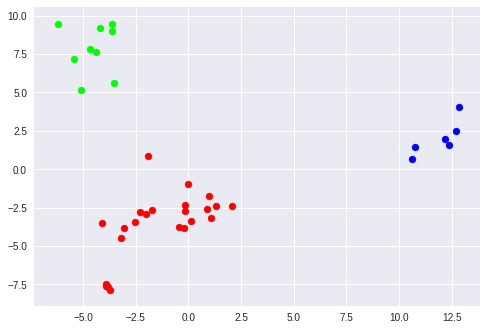

Polynomial. p = 2, c = 34.


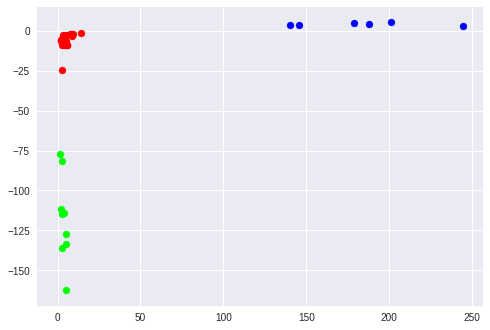

RBF. sigma = 15.


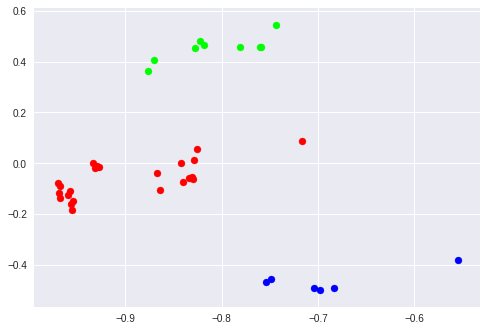

PCA.


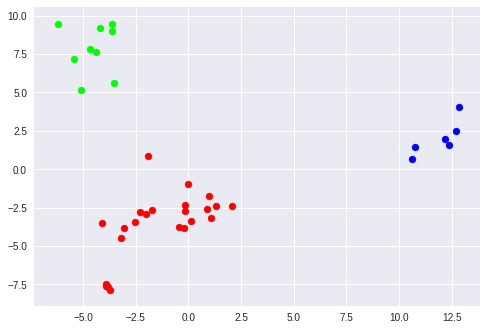

In [28]:
# -*- coding: utf-8 -*-
"""
@author: laura
"""

import numpy as np
from scipy.linalg import eigh
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.decomposition import PCA

class Kernell:
    """
    Kernell class
    """
    @staticmethod
    def linear(X):
        """
        Compute linear kernel of given data.
        """
        return X.T.dot(X)
    @staticmethod
    def polynomial(X, p=2, c=1.):
        """
        Compute polynomial kernel of given data.
        :param p: degree of kernel
        :param c: constant value
        """
        return np.power(X.T.dot(X) + c, p)
    @staticmethod
    def RBF(X, sigma=15):
        """
        Compute RBF kernel of given data.
        """
        return np.exp(-squareform(pdist(X.T))**2/(2*sigma**2))

def center_data(X):
    m = np.mean(X, axis=1)
    for vector in X.T:
        vector -= m
    return X

def fit_transform(K, n_comps):
    """
    Compute eigenvectors, eigenvalues and the projections.
    :param K: Kernell matrix
    :param n_comps: number of components to be projected on
    """
    eig_val, eig_vec = eigh(K, eigvals=(K.shape[0]-n_comps, K.shape[0]-1)) #take top n_comps singular vectors and values
    return np.fliplr(np.sqrt(eig_val)*eig_vec)


if __name__ == "__main__":

	#X = np.diag([1., 2., 3., 4.])
	q = 2
	X = np.array([[17., 13., 14., 16., 4., 9., 14., 1., 13., 0, 11., 13., 5., 
                7., 1., 4., 11., 5.], [12., 11., 9., 12., 6., 5., 12., 1., 9.,
                1., 7., 12., 5., 6., 0., 4., 8., 2.],[18., 16., 16., 16., 8., 
                6., 14., 1., 14., 0., 9., 12., 4., 8., 0., 2., 11., 3.],[18., 
                16., 15., 19., 8., 6., 11., 1., 15., 1., 7., 13., 5., 8., 0.,
                2., 9., 3.],[17., 13., 13., 22., 8., 4., 18., 1., 10., 3., 8., 
                11., 7., 6., 1., 2., 10., 2.],[16., 13., 16., 21., 9., 3., 17.,
                1., 10., 4., 7., 12., 7., 5., 1., 2., 11., 3.],[22., 19., 10.,
                16., 10., 4., 18., 1., 12., 2., 8., 11., 6., 8., 0., 1., 8., 2.],
                [20., 10., 24., 10., 6., 9., 21., 0., 7., 0., 7., 18., 4., 9.,
                1., 4., 8., 2.],[20., 21., 12., 15., 9., 7., 11., 1., 9., 3.,
                8., 14., 6., 7., 0., 1., 10., 3.],[20., 21., 12., 15., 9., 7.,
                11., 1., 9., 3., 9., 14., 5., 7., 0., 1., 10., 3.],[18., 11.,
                24., 10., 9., 6., 19., 0., 12., 0., 7., 14., 4., 11., 0., 4.,
                9., 1.],[20., 12., 23., 10., 8., 5., 20., 0., 13., 0., 6., 13.,
                4., 11., 0., 4., 10., 1.],[18., 19., 18., 16., 8., 4., 12., 0.,
                12., 0., 10., 15., 8., 6., 1., 1., 12., 1.],[17., 16., 17., 
                15., 8., 6., 14., 1., 14., 0., 9., 12., 4., 8., 0., 3., 11., 3],
                [19., 17., 14., 16., 8., 6., 14., 1., 14., 0., 8., 12., 4., 8.,
                0., 2., 12., 3.],[19., 17., 15., 16., 8., 5., 14., 1., 14., 0.,
                8., 12., 4., 8., 0., 2., 12., 3.],[19., 15., 16., 16., 8., 6.,
                14., 1., 15., 0., 8., 12., 4., 8., 0., 2., 12., 3.],[17., 17.,
                16., 19., 8., 6., 11., 1., 15., 1., 7., 13., 5., 8., 0., 2., 
                9., 3.],[18., 17., 15., 19., 8., 6., 11., 1., 15., 1., 7., 13.,
                5., 8., 0., 2., 9., 3.],[22., 19., 10., 16., 10., 5., 17., 1.,
                12., 2., 8., 11., 6., 8., 0., 1., 8., 2.],[18., 20., 10., 18.,
                6., 8., 17., 1., 14., 1., 5., 16., 4., 7., 0., 2., 9., 2.],
                [18., 16., 16., 15., 8., 6., 13., 1., 14., 1., 8., 12., 4., 8.,
                1., 2., 12., 3.],[20., 21., 12., 15., 9., 7., 11., 1., 10., 3.,
                8., 14., 7., 7., 0., 1., 9., 3.],[20., 21., 12., 15., 9., 7., 
                11., 1., 10., 3., 9., 14., 5., 7., 0., 1., 10., 3.],[18., 12.,
                23., 10., 9., 5., 20., 0., 14., 0., 7., 12., 4., 11., 0., 4.,
                10., 1.],[18., 12., 21., 10., 10., 5., 18., 0., 13., 0., 8., 
                12., 4., 12., 0., 4., 10., 1.],[17., 12., 22., 10., 8., 5., 
                18., 0., 14., 0., 5., 13., 4., 10., 0., 3., 9., 1.],[17., 16.,
                16., 16., 8., 6., 15., 1., 14., 0., 9., 12., 4., 8., 0., 2., 
                11., 3.],[19., 17., 15., 17., 7., 6., 15., 1., 14., 0., 8., 
                12., 4., 8., 0., 2., 10., 3.],[18., 16., 16., 19., 8., 6., 11.,
                1., 15., 1., 7., 13., 5., 8., 0., 2., 9., 3.],[18., 17., 15., 
                17., 8., 6., 15., 1., 14., 0., 8., 12., 4., 8., 0., 3., 9., 3.],
                [15., 12., 14., 23., 8., 3., 17., 1., 9., 4., 7., 15., 6., 6., 
                1., 2., 11., 2.],[13., 11., 14., 22., 7., 3., 17., 1., 10., 4.,
                8., 13., 6., 6., 1., 3., 11., 2.],[16., 11., 15., 23., 10., 4.,
                18., 1., 10., 3., 7., 12., 6., 5., 1., 2., 9., 3.],[14., 11., 
                14., 25., 11., 3., 19., 2., 10., 2., 7., 12., 6., 5., 1., 2., 
                9., 3.],[11., 11., 15., 24., 10., 5., 18., 1., 11., 1., 7., 
                14., 5., 7., 2., 3., 11., 2.],[15., 9., 12., 21., 8., 4., 21., 
                1., 10., 3., 7., 15., 7., 6., 1., 3., 10., 3.],[15., 11., 15., 
                22., 7., 3., 19., 1., 8., 3., 4., 14., 6., 5., 1., 2., 10., 2.]])

	#X = np.array([[0., 2., 3., 1., 1., 0.], [2., 0., 1., 0., 5., 8.], [1., 4., 2., 2., 5., 3.]])
	#print(X.shape)
	X = X.T
	#print('KPCA reducing dimension from %d to %d.' % (X.shape[1], q))
	#print(X)
	X = center_data(X)
	#print(X)

	p_lin = fit_transform(Kernell.linear(X), q)
	print('Linear.')
	#print(p_lin)
	#plt.plot(p_lin[:,0],p_lin[:,1],'ro')
	#plt.show()
	colorsToUse = np.zeros((38,3))
	for i in range(0,38):
		if p_lin[i,0] <5 :
			if  p_lin[i,1]< 2.5:
				colorsToUse [i,0]=1
			else:
				colorsToUse [i,1]=1
		else:
			colorsToUse [i,2]=1
                
	#print(color)       
	for i in range(0,38):
		plt.scatter(p_lin[i,0],p_lin[i,1],color = colorsToUse[i,:]) #,c = color[i,:]
	plt.show()
    
	p_pol = fit_transform(Kernell.polynomial(X, 2, 34), q)
	print('Polynomial. p = 2, c = 34.')
	#print(p_pol)
	for i in range(0,38):
		plt.scatter(p_pol[i,0],p_pol[i,1],color = colorsToUse[i,:]) #,c = color[i,:]
	#plt.savefig('kpca_poly_p2_c34.pdf', bbox_inches='tight', transparent=True)
	#files.download("kpca_poly_p2_c34.pdf")
	plt.show()

	p_rbf = fit_transform(Kernell.RBF(X, 15), q)
	print('RBF. sigma = 15.')
	#print(p_rbf)
	#plt.plot(p_rbf[:,0],p_rbf[:,1],'go')
	#plt.show()

	for i in range(0,38):
		plt.scatter(p_rbf[i,0],p_rbf[i,1],color = colorsToUse[i,:]) #,c = color[i,:]
	#plt.savefig('kpca_rbf_sigma15.pdf', bbox_inches='tight', transparent=True)
	#files.download("kpca_rbf_sigma15.pdf")
	plt.show()

	X = X.T
  
	print('PCA.')
	pca = PCA(n_components=2)
	projections = pca.fit_transform(X)
	for i in range(0,38):
		plt.scatter(projections[i,0],projections[i,1],color = colorsToUse[i,:])
	#plt.savefig('pca.pdf', bbox_inches='tight', transparent=True)
	#files.download("pca.pdf")
	plt.show()